<a href="https://colab.research.google.com/github/varunpandey471/Linear-Regression-M1_Car-Pricing/blob/main/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Pricing Predictor Using Machine Learning Algorithm 

In [12]:
import numpy as np
import pandas as pd
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasheet/CarPricesData.csv')

In [2]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


1st We are going to check any Null Data Available or Not

In [5]:
df.isnull().sum()/len(df)*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

Here null Value is less then 1 % so i Decided to Delate this value

In [23]:
df.dropna(axis=0,inplace=True)

In [24]:
df.isnull().sum()/len(df)*100

Price        0.0
Age          0.0
KM           0.0
FuelType     0.0
HP           0.0
MetColor     0.0
Automatic    0.0
CC           0.0
Doors        0.0
Weight       0.0
dtype: float64

Now No Null Value value availabe seen above

In [25]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [26]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


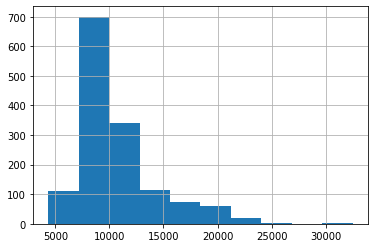

In [27]:
df['Price'].hist()

In [40]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,10724.133240,55.927770,68677.957924,101.436886,0.673913,0.055400,1567.156381,4.035063,1072.448808
std,3618.725942,18.575886,37557.809031,14.820157,0.468944,0.228839,187.355356,0.952281,52.683076
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63567.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87226.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [45]:
df.nunique()

Price         236
Age            77
KM           1253
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [47]:
print(df.shape)
print(list(df.columns))

(1426, 10)
['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']


In [48]:
import matplotlib.pyplot as plt
cat_col=['FuelType','HP','MetColor','Automatic','CC','Doors']
num_col=['Age','KM','Weight']

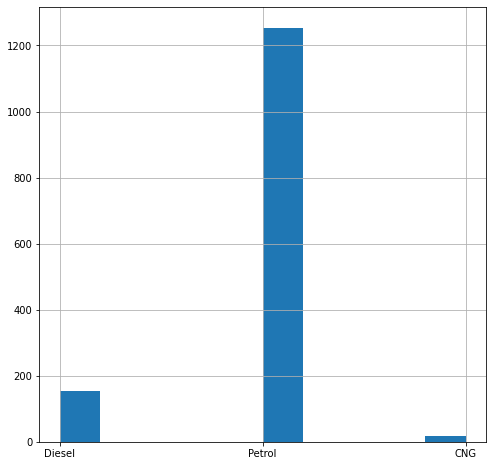

FuelType


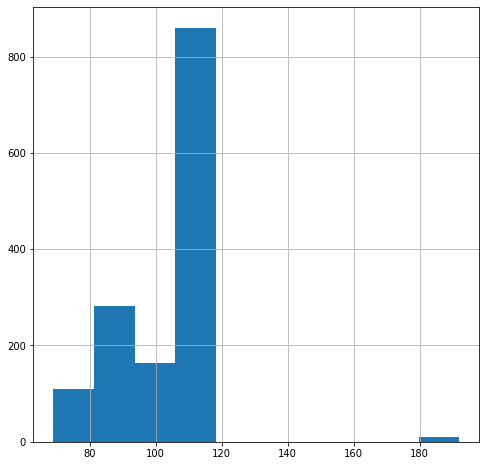

HP


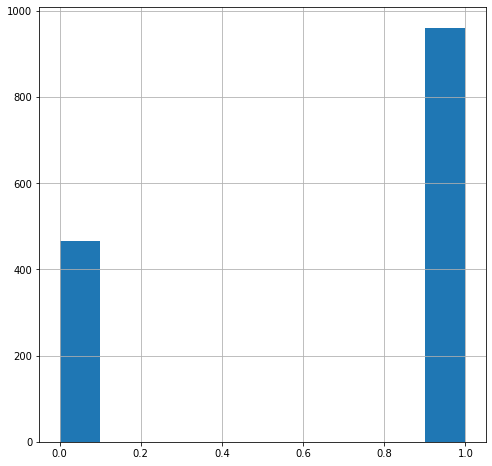

MetColor


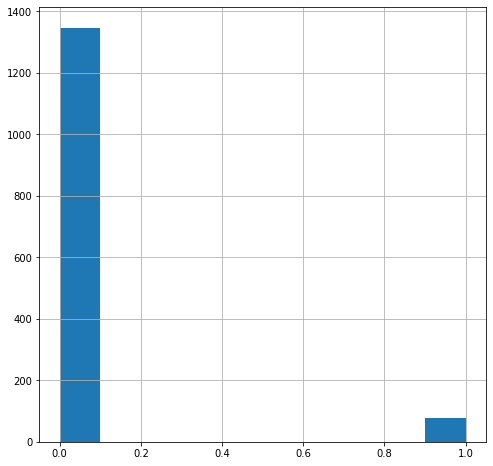

Automatic


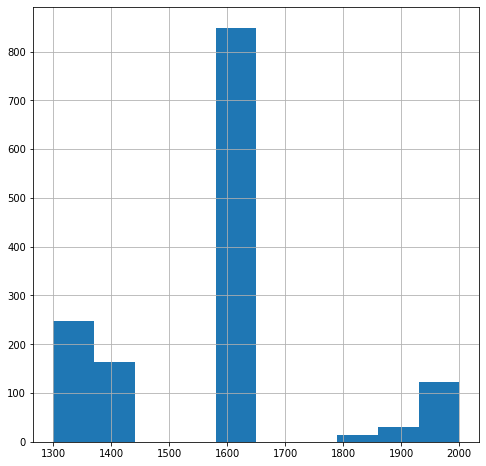

CC


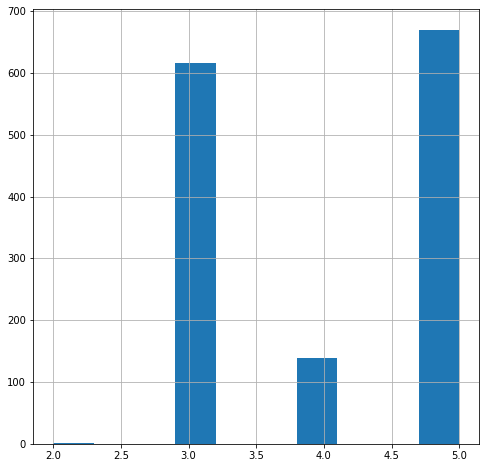

Doors


In [55]:
for col in cat_col:
  fig=plt.figure(figsize=(8,8))
  
  df[col].hist()
  plt.show()
  print(col)

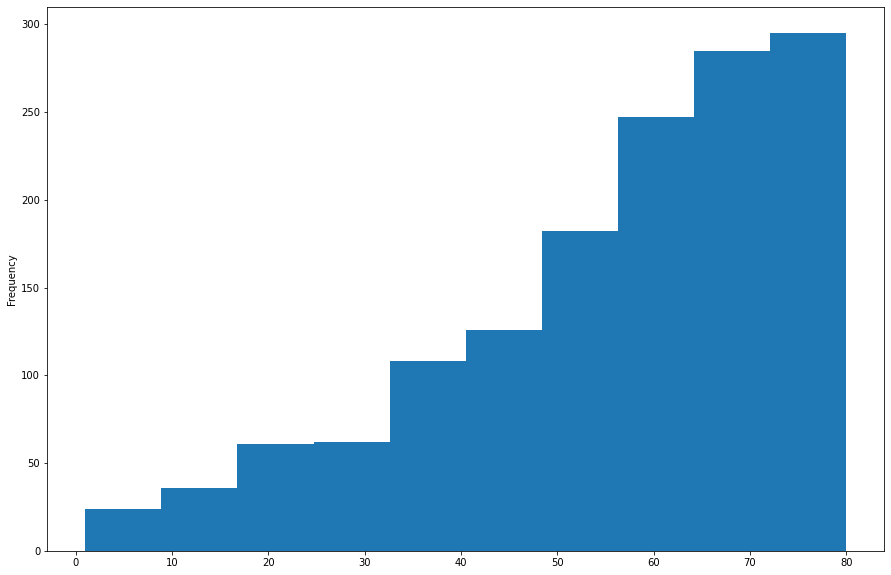

Age


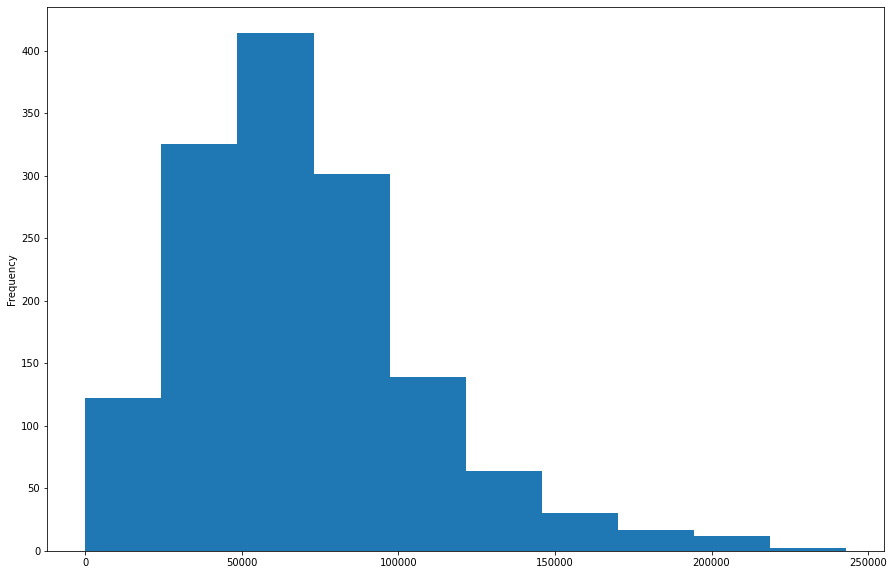

KM


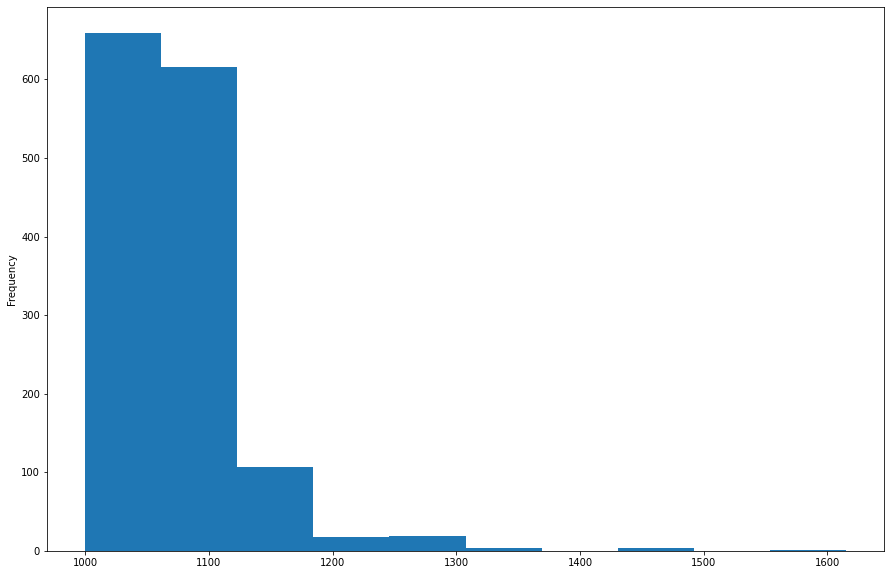

Weight


In [60]:
for col in num_col:
  fig=plt.figure(figsize=(15,10))
  
  df[col].plot(kind='hist')
  plt.show()
  print(col)

In [65]:
df['Weight'][df['Weight']<1400].sort_values(ascending=False).head(8)

113    1320.0
138    1320.0
112    1320.0
115    1280.0
119    1275.0
68     1275.0
45     1270.0
116    1270.0
Name: Weight, dtype: float64

In [68]:
df['Weight'][df['Weight']>1400]=1320

In [70]:
df['Weight'][df['Weight']>1400].sort_values(ascending=False).head(8)

Series([], Name: Weight, dtype: float64)

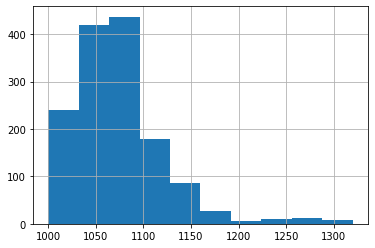

In [72]:
df['Weight'].hist()

In [39]:
df.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

In [77]:
y=df['Price']
x=df.drop(['Price','FuelType'],axis=1)

In [78]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler


PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X
x=PredictorScalerFit.transform(x)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=234)

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score



In [81]:
mean_absolute_error(y_test,pred)

1005.4975631389481

In [82]:
r2_score(y_test,pred)

0.8537386523853898

In [84]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(lr, x , y, cv=10)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [ 0.33893995  0.78403019  0.48160708  0.12552807 -0.08741593  0.170776
 -0.84047287  0.39362843 -0.32986963 -0.48583484]

Final Average Accuracy of the model: 0.06
